# Setup

In [157]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import binarize
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
sns.set_theme()

# Data loading

In [3]:
data = fetch_openml("Pima-Indians-Diabetes", parser="auto")

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(data.DESCR)

DESCRIPTION
Problem Statement
    NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
    The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
    Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.
Variables    Description
Pregnancies    Number of times pregnant
Glucose    Plasma glucose concentration in an oral glucose tolerance test
BloodPressure    Diastolic blood pressure (mm Hg)
SkinThickness    Triceps skinfold thickness (mm)
Insulin    Two hour se

In [6]:
X = data.data
y = data.target

# Data frame

In [7]:
df = pd.DataFrame(data=data.frame)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


# Data visualization

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


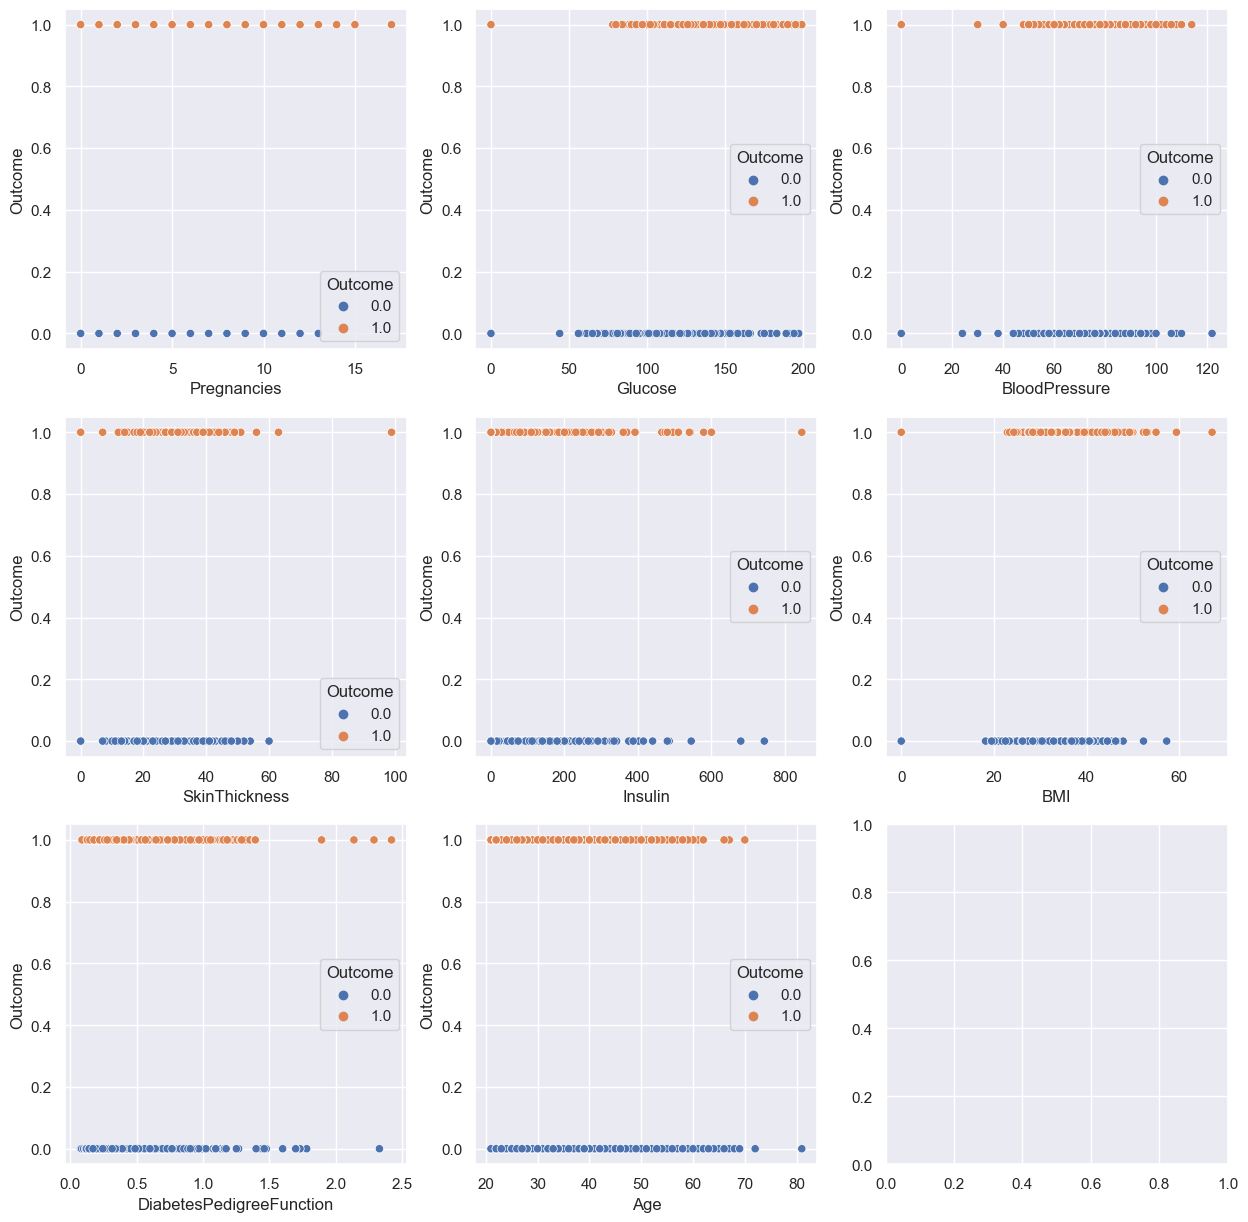

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i in range(0, len(data["feature_names"])):
    col = data["feature_names"][i]
    sns.scatterplot(data=df, x=col, y="Outcome", hue="Outcome", ax=axs[i])

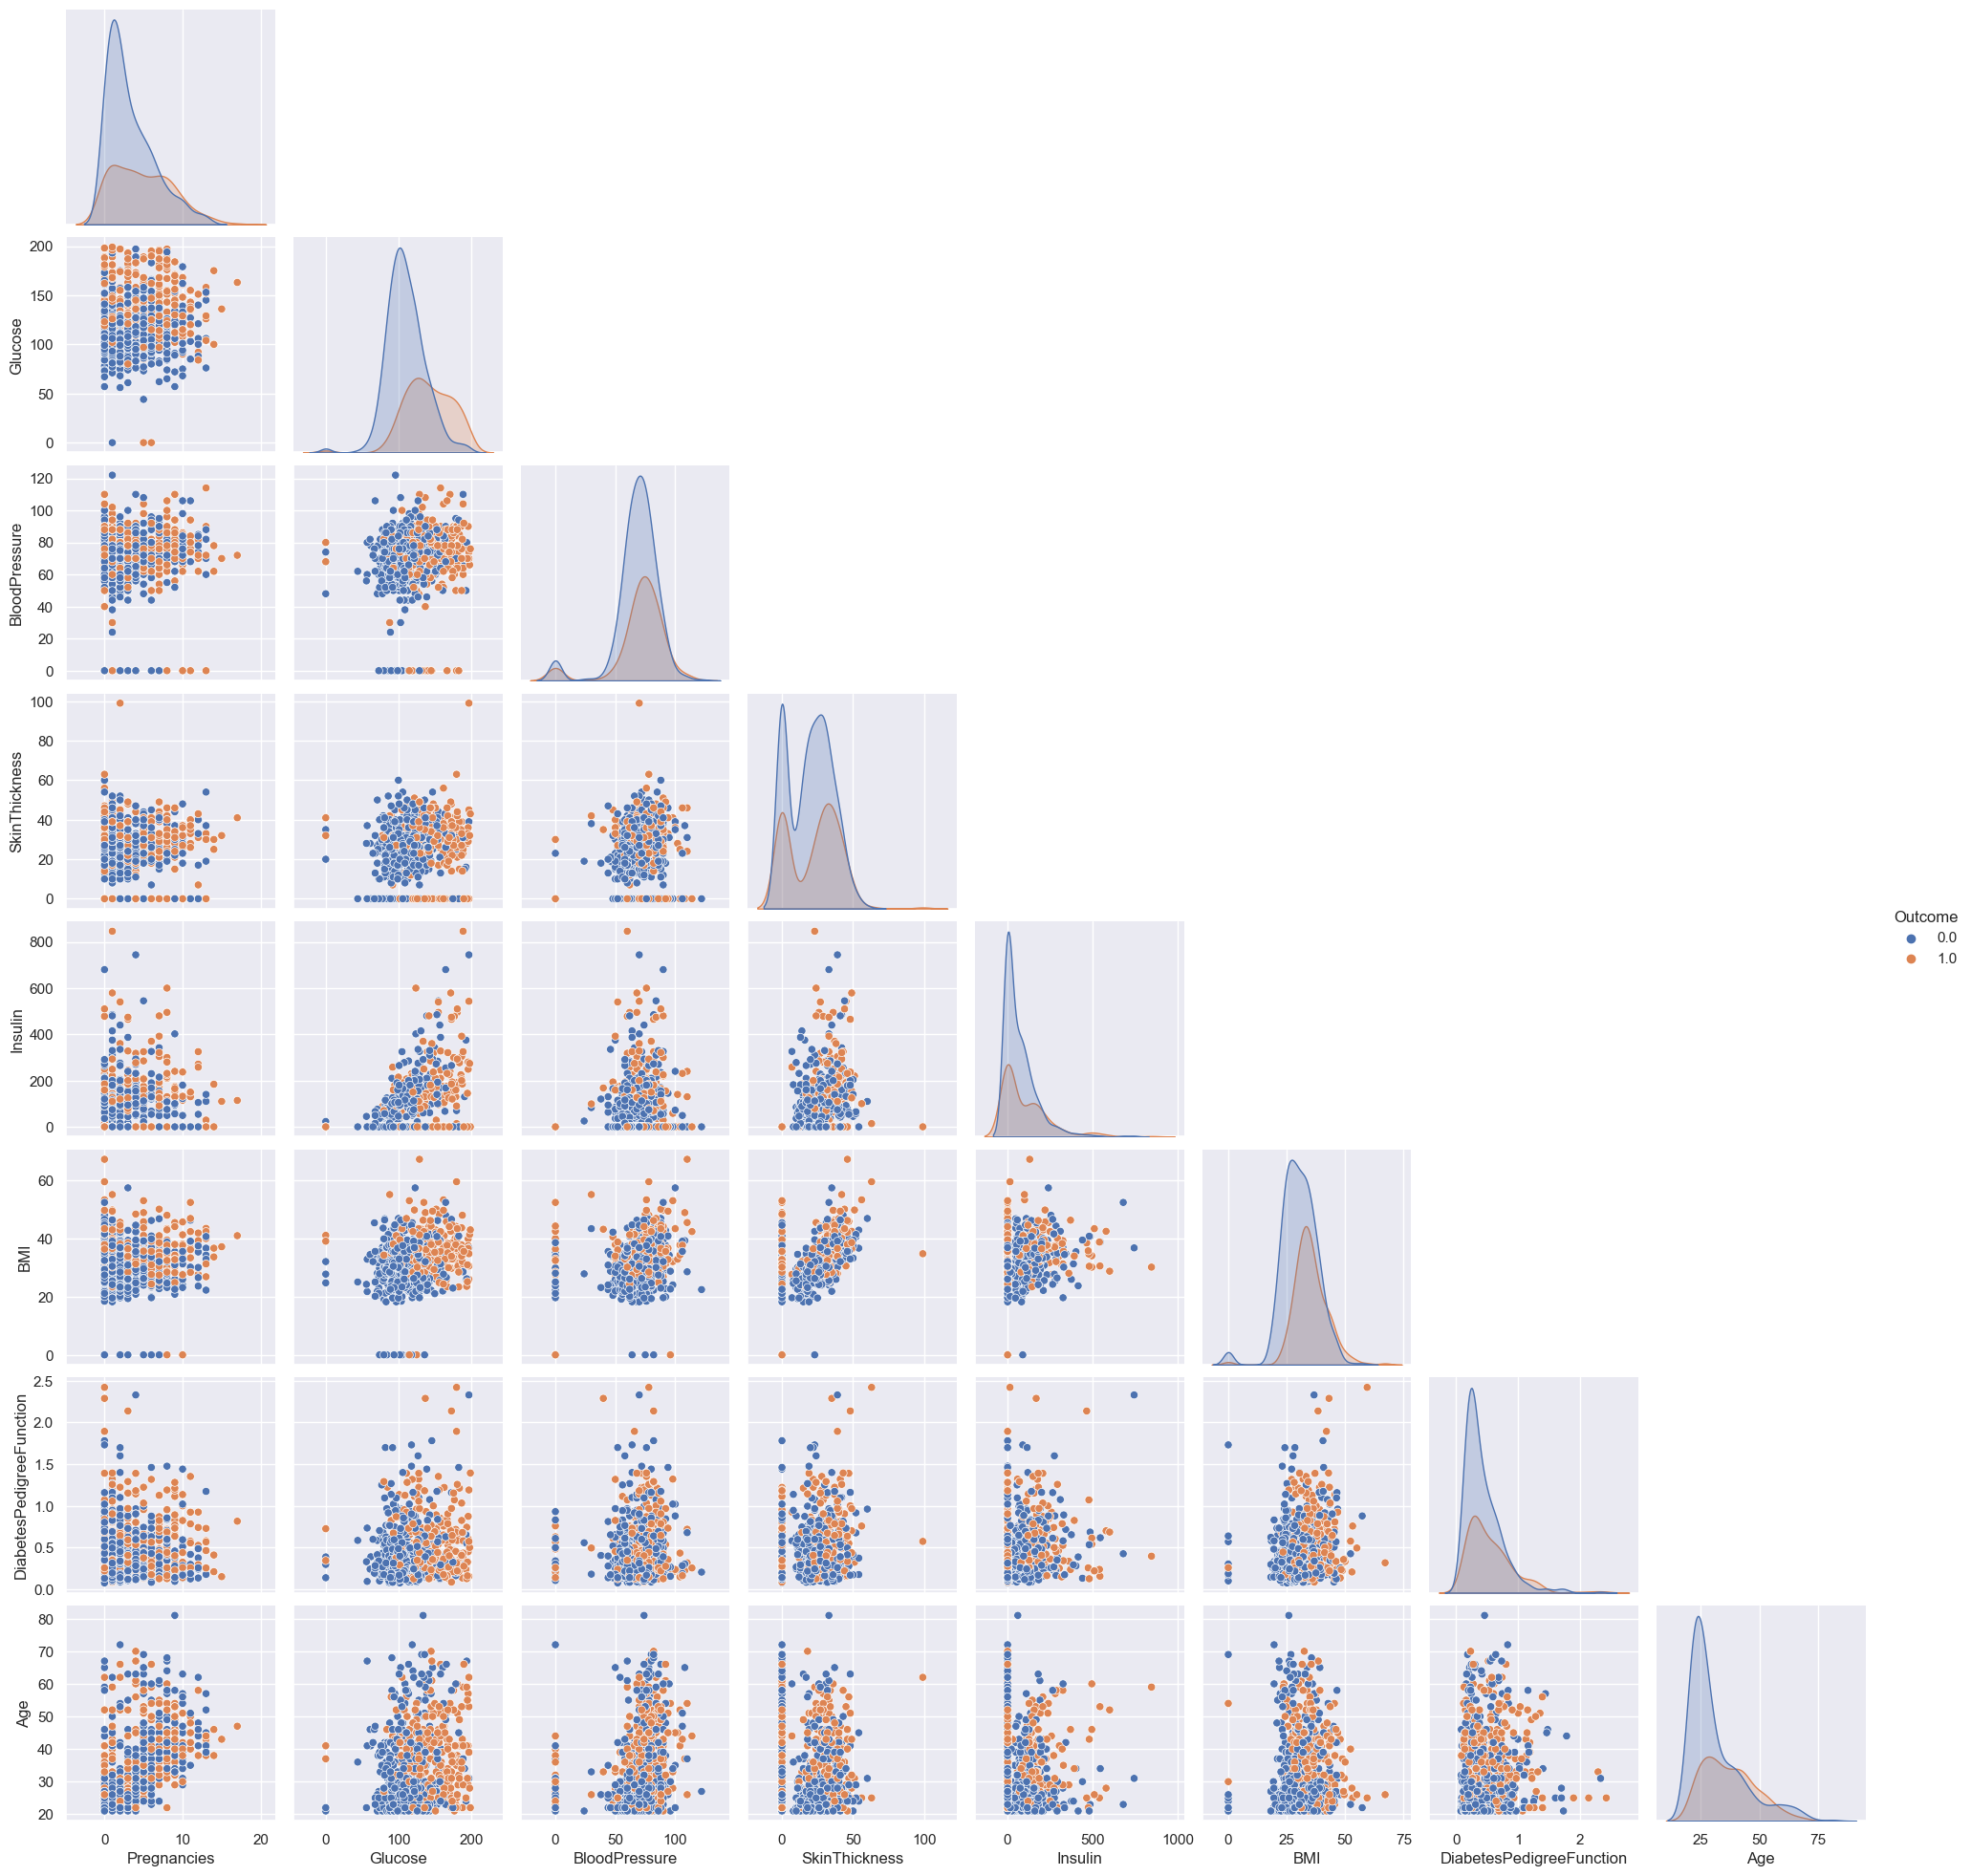

In [11]:
_ = sns.pairplot(data=df, hue="Outcome", corner=True)

# Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape

(576, 8)

In [14]:
X_test.shape

(192, 8)

# Modelling

## Null accuracy


In [15]:
outcomes = y_test.value_counts(normalize=True)
outcomes

0.0    0.640625
1.0    0.359375
Name: Outcome, dtype: float64

In [16]:
outcomes.max()

0.640625

## Logistic Regression

In [17]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7239583333333334

### Grid Search

In [18]:
param_grid = dict(C=np.arange(0.1,3.1,0.1))
model = LogisticRegression(max_iter=300)
grid = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=10, verbose=True)
_ = grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [19]:
grid_results = pd.DataFrame(grid.cv_results_)

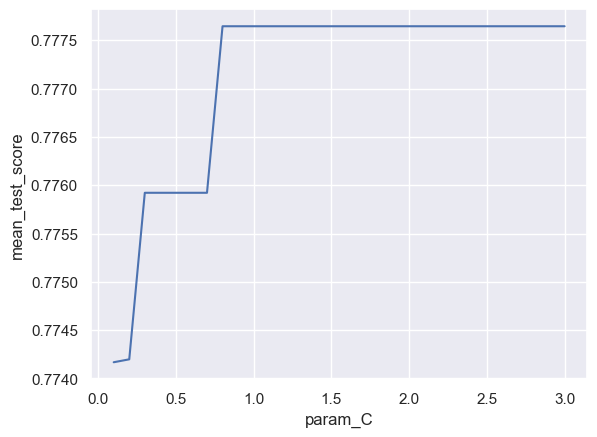

In [20]:
_ = sns.lineplot(x=grid_results["param_C"], y=grid_results["mean_test_score"])

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.8}
0.7776467029643073


## KNN

In [22]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.65625

### Grid Search

In [23]:
param_grid = dict(n_neighbors=range(1, 32), weights=["uniform", "distance"])
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=10, verbose=True)
_ = grid.fit(X_train, y_train)

Fitting 10 folds for each of 62 candidates, totalling 620 fits


In [24]:
grid_results = pd.DataFrame(grid.cv_results_)

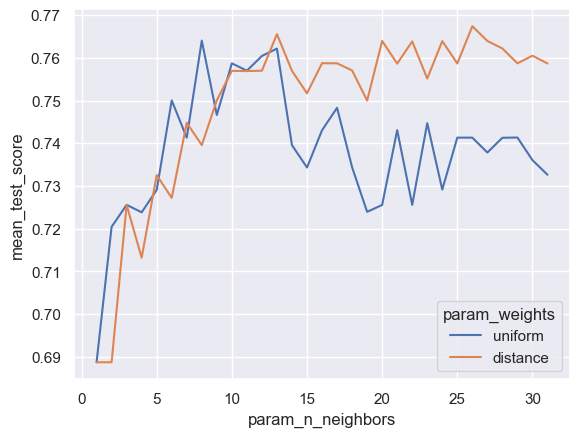

In [25]:
_ = sns.lineplot(x=grid_results["param_n_neighbors"], y=grid_results["mean_test_score"], hue=grid_results["param_weights"])

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 26, 'weights': 'distance'}
0.7673926194797338


## Final model

In [27]:
model = LogisticRegression(max_iter=200, C=0.9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7239583333333334

In [28]:
y_test_pred = model.predict(X_test)
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

### Confusion matrix

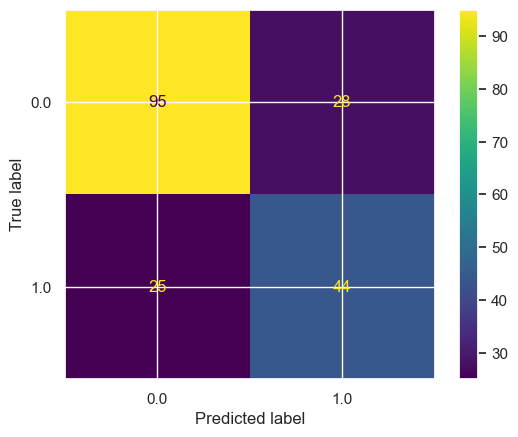

In [29]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

#### Metrics

##### Classification Accuracy
How often is the classifier correct?

In [30]:
metrics.accuracy_score(y_test, y_test_pred)

0.7239583333333334

##### Classification Error
How often is the classifier incorrect?

In [31]:
1 - metrics.accuracy_score(y_test, y_test_pred)

0.27604166666666663

##### Sensitivity (Recall or True Positive Rate)
How often is the prediction correct when the actual value is positive?

In [32]:
metrics.recall_score(y_test, y_test_pred, pos_label=1)

0.6376811594202898

##### Specificity (True Negative Rate)
How often is the prediction correct when the actual value is negative?

In [33]:
metrics.recall_score(y_test, y_test_pred, pos_label=0)

0.7723577235772358

##### False Positive Rate

In [34]:
1 - metrics.recall_score(y_test, y_test_pred, pos_label=0)

0.22764227642276424

##### Precision
How often is the prediction correct when the prediction value is positive?

In [35]:
metrics.precision_score(y_test, y_test_pred)

0.6111111111111112

> Need to improve **sensitivity** for this problem

### Adjusting the classification threshold
Decreasing the classification threshold increases sensitivity

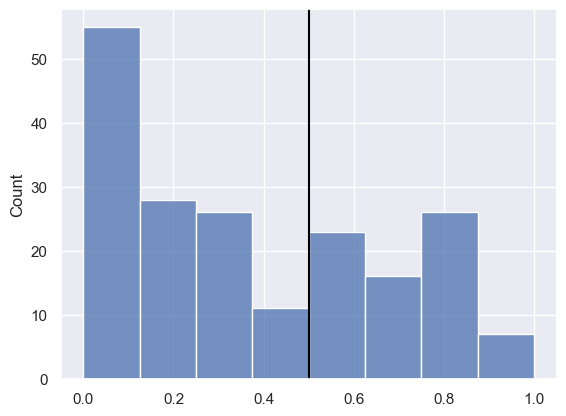

In [36]:
ax = sns.histplot(x=y_test_pred_prob, binrange=[0, 1], bins=8)
_ = ax.axvline(x=0.5, color="black")

#### ROC Curve

In [148]:
roc = metrics.roc_curve(y_test, y_test_pred_prob)

In [149]:
roc_df = pd.DataFrame(np.array(roc).T, columns=["FPR", "TPR", "Threshold"])

In [150]:
fig = px.line(roc_df, x="FPR", y="TPR", markers=True, hover_data="Threshold")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    xaxis_title="False Positive Rate (1 - Specificity)",
    yaxis_title="True Positive Rate (Sensitivity)"
)
fig.show()


##### AUC

In [151]:
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.7922705314009661

Cross validation AUC

In [167]:
cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.8294928774928774

#### Using binarize

In [37]:
y_test_pred_class = binarize([y_test_pred_prob], threshold=0.3)[0]

##### Confusion Matrix

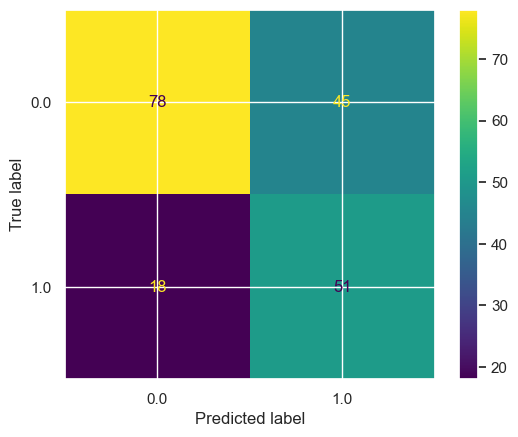

In [38]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_class)
plt.show()

##### Sensitivity

In [39]:
metrics.recall_score(y_test, y_test_pred_class, pos_label=1)

0.7391304347826086

##### Specificity

In [40]:
metrics.recall_score(y_test, y_test_pred_class, pos_label=0)

0.6341463414634146